In [9]:
import pandas as pd
folder_path = "C:\\Users\\ryuuu\\Downloads\\100knock-data_analytics\\1章\\"
customer_master = pd.read_csv(folder_path+"customer_master.csv")
item_master = pd.read_csv(folder_path+"item_master.csv")
transaction_1 = pd.read_csv(folder_path+"transaction_1.csv")
transaction_detail_1 = pd.read_csv(folder_path+"transaction_detail_1.csv")
transaction_2 = pd.read_csv(folder_path+"transaction_2.csv")
transaction_detail_2 = pd.read_csv(folder_path+"transaction_detail_2.csv")

In [10]:
transaction = pd.concat([transaction_1,transaction_2])
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2])

In [32]:
sales = pd.merge(transaction_detail,transaction[["transaction_id","payment_date","customer_id"]],on="transaction_id",how="left")
sales = pd.merge(sales,item_master,on="item_id")
sales = pd.merge(sales,customer_master,on="customer_id",how="left")

In [ ]:
sales.set_index("detail_id",inplace=True)
sales["price"] = sales["item_price"] * sales["quantity"]

In [37]:
sales.head(2)

,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,price
detail_id,,,,,,,,,,,,,,,,
0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,210000
1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,50000


In [40]:
sales.price.sum() == transaction.price.sum()

True

In [42]:
sales.isnull().sum()

transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
item_name             0
item_price            0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
price                 0
dtype: int64

In [48]:
print(f"{sales.payment_date.min()} ~ {sales.payment_date.max()}")
sales.describe()

2019-02-01 01:36:57 ~ 2019-07-31 23:41:38


,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000
mean,1.199888,121698.628219,50.265677,135937.150056
std,0.513647,64571.311830,17.190314,68511.453297
min,1.000000,50000.000000,20.000000,50000.000000
25%,1.000000,50000.000000,36.000000,85000.000000
50%,1.000000,102500.000000,50.000000,120000.000000
75%,1.000000,187500.000000,65.000000,210000.000000
max,4.000000,210000.000000,80.000000,420000.000000


In [49]:
sales.dtypes

transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
item_name             object
item_price             int64
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
price                  int64
dtype: object

In [50]:
sales.payment_date = pd.to_datetime(sales.payment_date)

In [54]:
sales["payment_month"] = sales.payment_date.dt.strftime("%Y%m")

In [59]:
sales.groupby("payment_month")["price"].sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [61]:
sales.groupby(["payment_month","item_name"])[["price","quantity"]].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [63]:
pd.pivot_table(sales,index="item_name",columns="payment_month",values=["price","quantity"],aggfunc="sum")

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [64]:
graph_data = pd.pivot_table(sales,index="payment_month",columns="item_name",values="price",aggfunc="sum")

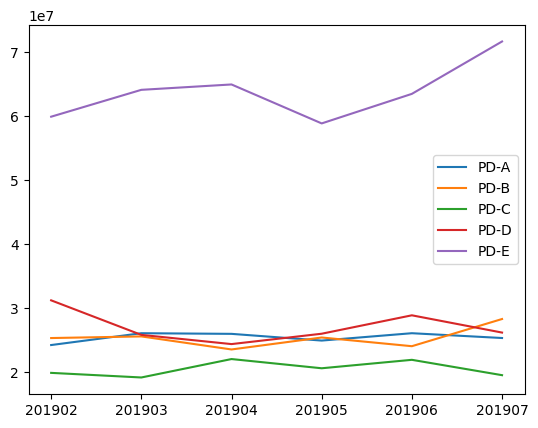

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(graph_data.index),graph_data["PC-A"],label="PD-A")
plt.plot(list(graph_data.index),graph_data["PC-B"],label="PD-B")
plt.plot(list(graph_data.index),graph_data["PC-C"],label="PD-C")
plt.plot(list(graph_data.index),graph_data["PC-D"],label="PD-D")
plt.plot(list(graph_data.index),graph_data["PC-E"],label="PD-E")
plt.legend()
plt.show()